In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import string as st
import os

## Make the dataset using numpy

In [2]:
# Use only the asl_dataset
sign_lang = [[], [], [], []] #x_train, y_train, x_test, y_test
lower = st.digits + st.ascii_lowercase
upper = st.digits + st.ascii_uppercase
path = os.path.join('asl_alphabet_train', 'asl_alphabet_train')

# Train
# asl_dataset
for fold in os.listdir('asl_dataset'):
    for img_name in os.listdir(os.path.join('asl_dataset', fold))[:400]:
        img = Image.open(os.path.join('asl_dataset', fold, img_name))
        img = img.resize((80, 80)).convert(mode='L')
        a = np.asarray(img).astype('int16')
        sign_lang[0].append(a)
        sign_lang[1].append((lambda fold : lower.index(fold))(fold))
# asl_alphabet_train
for fold in os.listdir(path):
    for img_name in os.listdir(os.path.join(path, fold))[:650]:
        img = Image.open(os.path.join(path, fold, img_name))
        img = img.resize((80, 80)).convert(mode='L')
        a = np.asarray(img).astype('int16')
        sign_lang[0].append(a)
        sign_lang[1].append((lambda fold : upper.index(fold))(fold))
# Test
# asl_dataset
for fold in os.listdir('asl_dataset'):
    for img_name in os.listdir(os.path.join('asl_dataset', fold))[400:]:
        img = Image.open(os.path.join('asl_dataset', fold, img_name))
        img = img.resize((80, 80)).convert(mode='L')
        a = np.asarray(img).astype('int16')
        sign_lang[2].append(a)
        sign_lang[3].append((lambda fold : lower.index(fold))(fold))
# asl_alphabet_train
for fold in os.listdir(path):
    for img_name in os.listdir(os.path.join(path, fold))[650:]:
        img = Image.open(os.path.join(path, fold, img_name))
        img = img.resize((80, 80)).convert(mode='L')
        a = np.asarray(img).astype('int16')
        sign_lang[2].append(a)
        sign_lang[3].append((lambda fold : upper.index(fold))(fold))
sign_lang[0] = np.asarray(sign_lang[0])
sign_lang[1] = np.asarray(sign_lang[1])
sign_lang[2] = np.asarray(sign_lang[2])
sign_lang[3] = np.asarray(sign_lang[3])
sign_lang = np.asarray(sign_lang, dtype='object')

In [3]:
# Save the dataset
np.save('final_dataset', sign_lang, allow_pickle=True)

In [4]:
sign_lang[0].shape

(37800, 80, 80)

In [5]:
# Unpack the values
x_train, y_train, x_test, y_test = sign_lang

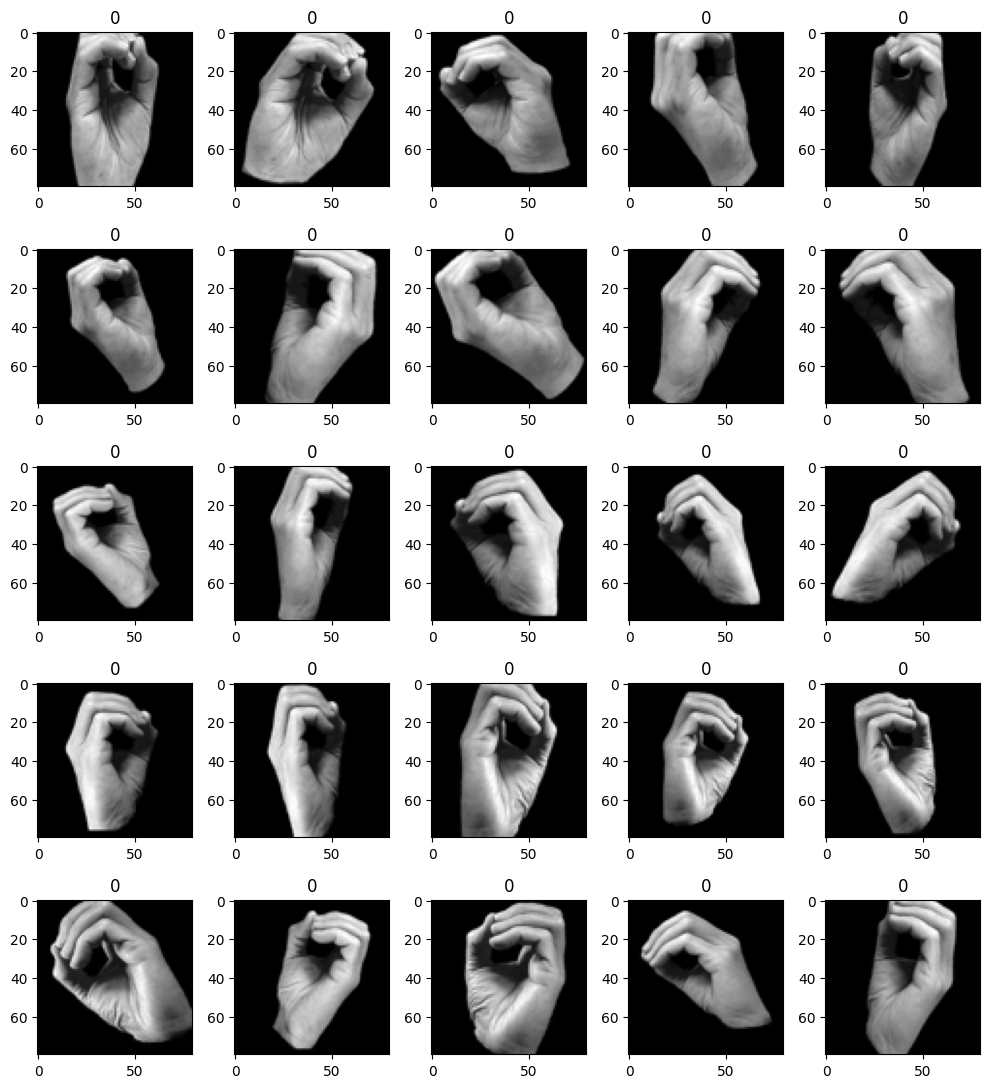

In [18]:
# Plot the first 25 images of the train dataset
fig, axs = plt.subplots(5, 5, tight_layout=True, figsize=(10, 11))
axs = axs.flatten()
for ind, ax in enumerate(axs):
    ax.imshow(x_train[ind], cmap='gray')
    ax.set_title('{}'.format((lambda label : lower[label])(y_train[ind])))
plt.show()

In [14]:
(x_train.shape, y_train.shape), (x_test.shape, y_test.shape)

(((37800, 80, 80), (37800,)), ((10105, 80, 80), (10105,)))

In [19]:
# Use only the seg dataset
sign_lang_seg = [[], [], [], []] #x_train, y_train, x_test, y_test
chars = st.digits + st.ascii_lowercase

# Train
for fold in os.listdir('seg dataset'):
    for img_name in os.listdir(os.path.join('seg dataset', fold))[:1200]:
        img = Image.open(os.path.join('seg dataset', fold, img_name))
        img = img.resize((150, 150)).convert(mode='L')
        a = np.asarray(img).astype('int16')
        sign_lang_seg[0].append(a)
        sign_lang_seg[1].append((lambda fold : chars.index(fold))(fold))
        
# Test
for fold in os.listdir('seg dataset'):
    for img_name in os.listdir(os.path.join('seg dataset', fold))[1200:]:
        img = Image.open(os.path.join('seg dataset', fold, img_name))
        img = img.resize((150, 150)).convert(mode='L')
        a = np.asarray(img).astype('int16')
        sign_lang_seg[2].append(a)
        sign_lang_seg[3].append((lambda fold : chars.index(fold))(fold))

sign_lang_seg[0] = np.asarray(sign_lang_seg[0])
sign_lang_seg[1] = np.asarray(sign_lang_seg[1])
sign_lang_seg[2] = np.asarray(sign_lang_seg[2])
sign_lang_seg[3] = np.asarray(sign_lang_seg[3])
sign_lang_seg = np.asarray(sign_lang_seg, dtype='object')

In [20]:
# Save the seg dataset
np.save('sign_lang_seg', sign_lang_seg, allow_pickle=True)

In [21]:
# Unpack the values
x_train, y_train, x_test, y_test = sign_lang_seg

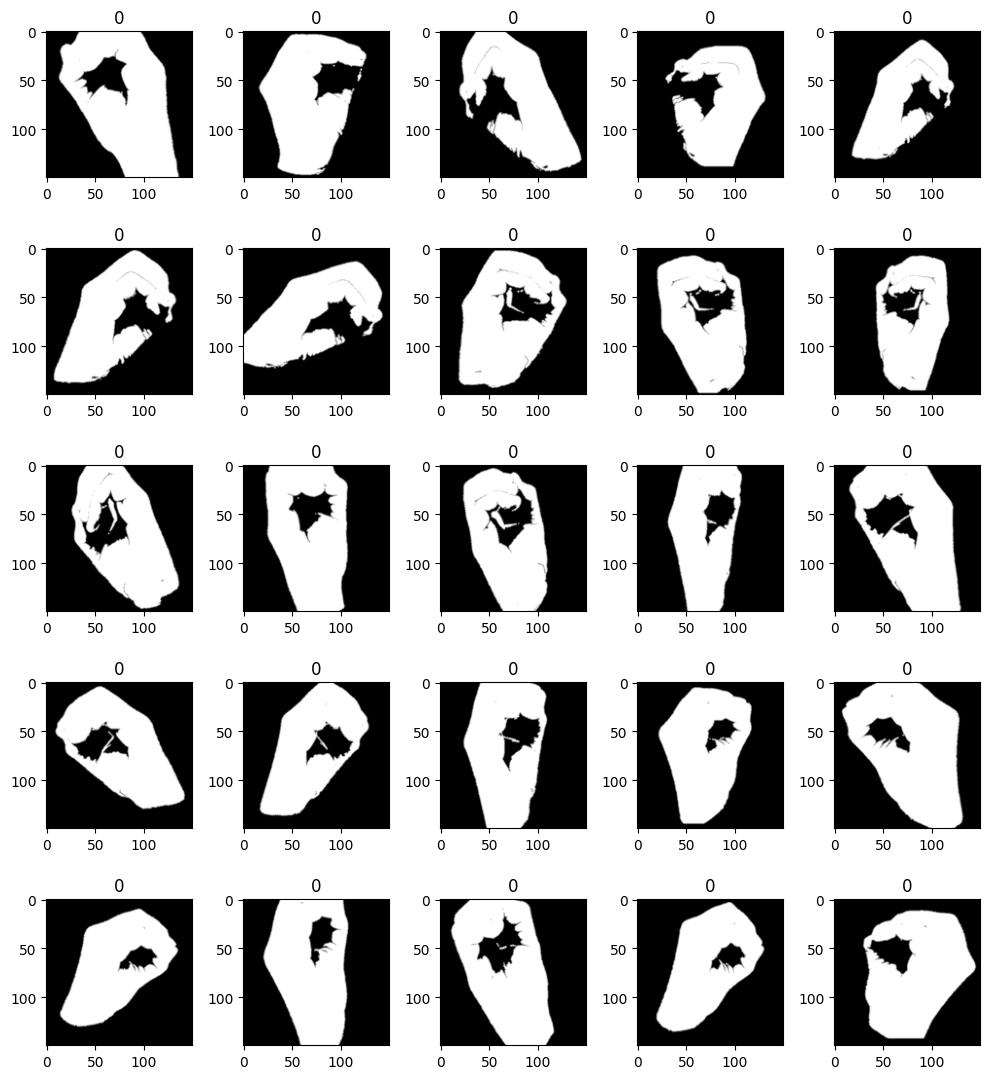

In [22]:
# Plot the first 25 images of the train segmentated dataset
fig, axs = plt.subplots(5, 5, tight_layout=True, figsize=(10, 11))
axs = axs.flatten()
for ind, ax in enumerate(axs):
    ax.imshow(x_train[ind], cmap='gray')
    ax.set_title('{}'.format((lambda label : chars[label])(y_train[ind])))
plt.show()